Challenge Description

Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. 

That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.

After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

You are asked to:

Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better

Explain why that might be happening. Are the localized translations really worse?

If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import data
test = pd.read_csv('./data/test_table.csv')
user = pd.read_csv('./data/user_table.csv')

In [6]:
# preview data
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [11]:
# preview data
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [13]:
# data size
print(test.shape)
print(user.shape)

(453321, 9)
(452867, 4)


In [202]:
# merge data
test = pd.merge(test,  user, left_on='user_id', right_on='user_id')

In [203]:
#  merged data size
test.shape

(452867, 12)

# Basic Data Exploration

In [10]:
# Date Range: 5 days 2015/11/30 - 2015/12/4
(set(test['date']))

{'2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04'}

In [16]:
# Number of unique users - test has slightly more users than users, all users are unique
print(len(set(test.user_id)))
print(len(set(user.user_id)))

453321
452867


In [19]:
# Number of Source (marketing channels) : Ads, SEO, Direct
print((set(test.source)))

{'Ads', 'SEO', 'Direct'}


In [20]:
# Type of Device
print(set(test.device))

{'Mobile', 'Web'}


In [21]:
# Type of Browswer Language
print(set(test.browser_language))

{'EN', 'ES', 'Other'}


In [22]:
# Type of Ads Channel
print(set(test.ads_channel))

{nan, 'Other', 'Bing', 'Yahoo', 'Facebook', 'Google'}


In [23]:
# Type of Browser
print(set(test.browser))

{'Chrome', 'IE', 'Iphone_App', 'Opera', 'Android_App', 'Safari', 'FireFox'}


In [28]:
# User age range - from 18 to 70 years old, 75% of the users are below 31 years old
print((user.age).describe())

count    452867.000000
mean         27.130740
std           6.776678
min          18.000000
25%          22.000000
50%          26.000000
75%          31.000000
max          70.000000
Name: age, dtype: float64


In [49]:
# 90% of the users are below age of 37
np.percentile(user.age,list(range(0,101,10)), keepdims=True)

array([[18.],
       [19.],
       [21.],
       [23.],
       [24.],
       [26.],
       [28.],
       [30.],
       [33.],
       [37.],
       [70.]])

In [51]:
# number of country of users - 17
print(len(set(user.country)))

17


In [214]:
# number of user in control and experimental group - roughly close
test.groupby(['date','test']).count()['user_id']

date        test
2015-11-30  0       37104
            1       33844
2015-12-01  0       37075
            1       33840
2015-12-02  0       37064
            1       33517
2015-12-03  0       52016
            1       47383
2015-12-04  0       73834
            1       67190
Name: user_id, dtype: int64

# Further Exploration

In [124]:
# Overall CVR
test.groupby(['test','conversion']).count()['user_id']

test  conversion
0     0             224242
      1              13096
1     0             206604
      1               9379
Name: user_id, dtype: int64

In [127]:
# CVR
print('cvr for control group :' + str(13096/(13096+223232)))
print('cvr for expermential group :' + str(9379/(9379+206604)))

cvr for control group :0.05541450864899631
cvr for expermential group :0.043424713982118966


It seems like CVR for control group is higher. Lets dig deeper.

([<matplotlib.axis.XTick at 0x112b99b70>,
 <a list of 5 Text xticklabel objects>)

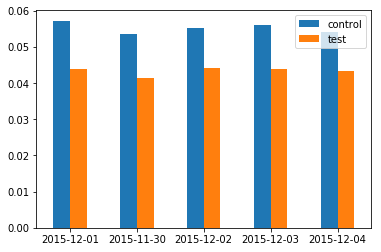

In [204]:
# CVR by date between control and experimental group
# control
a = pd.DataFrame(test[test['test']==0].groupby(['date','conversion']).count()['user_id'])
b = a[a.index.labels[1]==0]

c = pd.DataFrame(test[test['test']==0].groupby(['date','conversion']).count()['user_id'])
d = a[c.index.labels[1]==1]

e =  [list(d.user_id)[i] / (list(b.user_id)[i] + list(d.user_id)[i]) for i in range(0,len(d))]
e = pd.DataFrame(e, columns=['date'])

# experimental
a = pd.DataFrame(test[test['test']==1].groupby(['date','conversion']).count()['user_id'])
b = a[a.index.labels[1]==0]

c = pd.DataFrame(test[test['test']==1].groupby(['date','conversion']).count()['user_id'])
d = a[c.index.labels[1]==1]

ee =  [list(d.user_id)[i] / (list(b.user_id)[i] + list(d.user_id)[i]) for i in range(0,len(d))]
f = pd.DataFrame(ee, columns=['date'])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','test']


g.plot.bar()
plt.xticks([0,1,2,3,4],list(set(test.date)), rotation = 0)

There is not anything special on cvr among dates

([<matplotlib.axis.XTick at 0x11291bba8>,
 <a list of 3 Text xticklabel objects>)

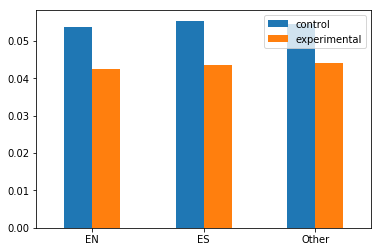

In [226]:
# browser language - highest cvr in each language and test group
# control
a = test[test['test'] == 0].groupby(['browser_language','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
d = ['EN','ES','Other']
e = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))],columns=['CVR'])

# experimental
a = test[test['test'] == 1].groupby(['browser_language','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
f = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','experimental']

g.plot.bar()
plt.xticks([0,1,2],d, rotation = 0)

There isn't anything special in cvr among different browser language.

([<matplotlib.axis.XTick at 0x114ded160>,
 <a list of 3 Text xticklabel objects>)

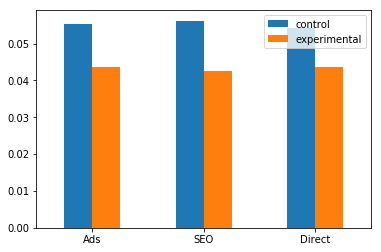

In [227]:
# Source (Marketing Channel) 
# control
a = test[test['test'] == 0].groupby(['source','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
d = ['Ads', 'SEO', 'Direct']
e = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))],columns=['CVR'])

# experimental
a = test[test['test'] == 1].groupby(['source','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
f = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','experimental']

g.plot.bar()
plt.xticks([0,1,2],d, rotation = 0)

There isn't anything significant on cvr among  marketing channels.

([<matplotlib.axis.XTick at 0x1125d8898>,
 <a list of 2 Text xticklabel objects>)

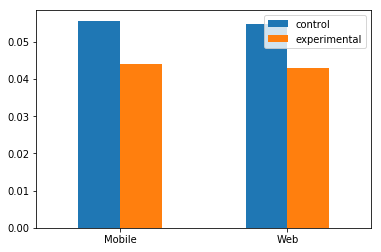

In [241]:
# Source (Marketing Channel) 
# control
a = test[test['test'] == 0].groupby(['device','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
d = ['Mobile', 'Web']
e = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))],columns=['CVR'])

# experimental
a = test[test['test'] == 1].groupby(['device','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
f = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','experimental']

g.plot.bar()
plt.xticks([0,1],d, rotation = 0)

([<matplotlib.axis.XTick at 0x12a9e1550>,
 <a list of 2 Text xticklabel objects>)

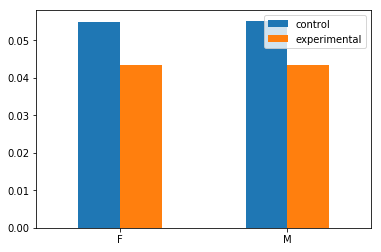

In [495]:
# Source (Marketing Channel) 
# control
a = test[test['test'] == 0].groupby(['sex','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
d = ['F', 'M']
e = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))],columns=['CVR'])

# experimental
a = test[test['test'] == 1].groupby(['sex','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
f = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','experimental']

g.plot.bar()
plt.xticks([0,1],d, rotation = 0)

Again, control results  in a higher cvr.

([<matplotlib.axis.XTick at 0x112aff0b8>,
 <a list of 5 Text xticklabel objects>)

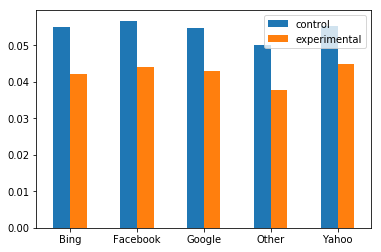

In [245]:
# Ads Channel
# control
a = test[test['test'] == 0].groupby(['ads_channel','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
d = ['Bing','Facebook','Google','Other','Yahoo']
e = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))],columns=['CVR'])

# experimental
a = test[test['test'] == 1].groupby(['ads_channel','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
f = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','experimental']

g.plot.bar()
plt.xticks([0,1,2,3,4],d, rotation = 0)

Although control results in higher CVR than experimental, Yahoo has a relatively higher cvr among the  other ads channels.

([<matplotlib.axis.XTick at 0x130296b70>,
 <a list of 7 Text xticklabel objects>)

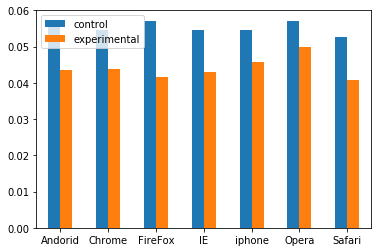

In [392]:
# Browser
# control
a = test[test['test'] == 0].groupby(['browser','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
d = ['Andorid','Chrome','FireFox','IE','iphone','Opera','Safari']
e = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))],columns=['CVR'])

# experimental
a = test[test['test'] == 1].groupby(['browser','conversion']).count()['user_id']
b = list(a[a.index.labels[1]==0]) # didn't convert
c = list(a[a.index.labels[1]==1]) # converted
f = pd.DataFrame([c[i] / (b[i]+c[i]) for i in range(0,len(b))])

g = pd.concat([e,f], axis=1)
g.columns  = ['control','experimental']

g.plot.bar()
plt.xticks([0,1,2,3,4,5,6],d, rotation = 0)

Control group continues to perform better than experimental. However, iPhone and Opera browser result in a significant higher cvr as compared to the other browser types.

/Users/wx3land/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'age' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


([<matplotlib.axis.XTick at 0x130318128>,
 <a list of 52 Text xticklabel objects>)

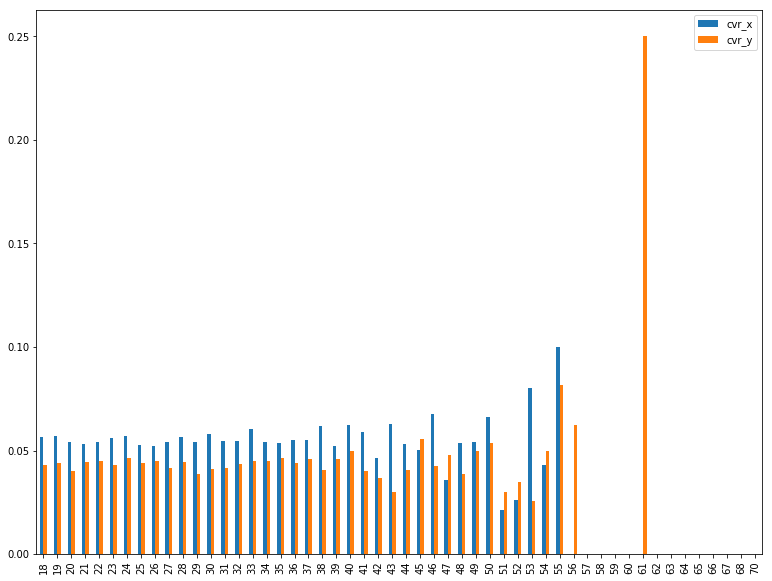

In [394]:
# age
# control
a = test[test['test'] == 0].groupby(['age','conversion']).count()['user_id']
b = pd.DataFrame(a[a.index.labels[1]==0]) # didn't convert
b['age'] = b.index.levels[0]
c = pd.DataFrame(a[a.index.labels[1]==1]) # converted
c['age'] = [c.index.values[i][0] for i in range(0, c.shape[0])]
d = pd.merge(b,c,left_on='age',right_on='age', how='outer')
d.columns = ['no_purchase','age','purchase']
d['cvr'] = d.purchase/(d.purchase+d.no_purchase)

# experimental
a = test[test['test'] == 1].groupby(['age','conversion']).count()['user_id']
b = pd.DataFrame(a[a.index.labels[1]==0]) # didn't convert
b['age'] = b.index.levels[0]
c = pd.DataFrame(a[a.index.labels[1]==1]) # converted
c['age'] = [c.index.values[i][0] for i in range(0, c.shape[0])]
dd = pd.merge(b,c,left_on='age',right_on='age', how='outer')
dd.columns = ['no_purchase','age','purchase']
dd['cvr'] = dd.purchase/(dd.purchase+dd.no_purchase)

e = pd.merge(d[['age','cvr']],dd[['age','cvr']], left_on='age',right_on='age', how='outer')

e[['cvr_x','cvr_y']].plot.bar(figsize=(13,10))
plt.xticks(np.arange(0, len(e.age)), e.age)

The figure above shows the relation among age, test group, and conversion. As shown, the conversion rate of control group is much higher in the younger users while the conversionr ate of the experimental group increases as the age of the users increases. This suggests the experimental group is more attractive to the older generations. This can due to the translator or the use of language such that the language can be 'too formal' or 'old fashion'.

There exists a cut off age at around 45 years old.

To further analyze the relation between age and experimental group, lets investigate the different countries. 

In [415]:
# Countries

(pd.DataFrame(test.groupby('country').count()['user_id'])).sort_values('user_id', ascending=False)

,user_id
country,
Mexico,128484
Colombia,54060
Spain,51782
Argentina,46733
Peru,33666
Venezuela,32054
Chile,19737
Ecuador,15895
Guatemala,15125


([<matplotlib.axis.XTick at 0x1297a05c0>,
 <a list of 17 Text xticklabel objects>)

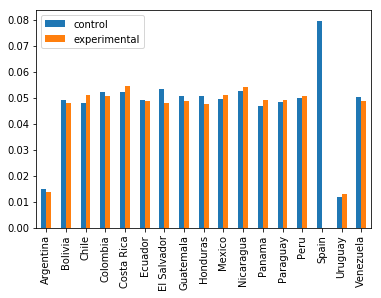

In [453]:
# CVR by countries
# control
a = test[test['test']==0].groupby(['country','conversion']).count()['user_id']
b = list((a[a.index.labels[1]==0])) # no purchase
c = list((a[a.index.labels[1]==1])) # purchase
d = pd.DataFrame([c[i]/(b[i]+c[i]) for i in range(0, len(c))])
d['country'] = a.index.levels[0]

# experimental
a = test[test['test']==1].groupby(['country','conversion']).count()['user_id']
b = list((a[a.index.labels[1]==0])) # no purchase
c = list((a[a.index.labels[1]==1])) # purchase
dd = pd.DataFrame([c[i]/(b[i]+c[i]) for i in range(0, len(c))])
dd['country'] = a.index.levels[0]


f = pd.merge(d,dd,left_on='country',right_on='country',how='outer')
f.columns = ['control','country','experimental']

f[['control','experimental']].plot.bar()
plt.xticks(np.arange(0,17), f.country)



If we look at cvr by countries, we will see there is not experimental in Spain as Spain team is already using local translator. In face,  out of the 16 countries, 8 of them experiences enhancement in cvr in experimental group while 8 did not. Yet, the difference is not noticeably differenty. Please refer to the table below

In [459]:
f['var'] = (f.experimental / f.control -1)*100
f.sort_values('var', ascending=False)

,control,country,experimental,var
15,0.012048,Uruguay,0.012907,7.125571
2,0.048107,Chile,0.051295,6.626552
11,0.046796,Panama,0.049370,5.502136
4,0.052256,Costa Rica,0.054738,4.749722
9,0.049495,Mexico,0.051186,3.417926
10,0.052647,Nicaragua,0.054177,2.905737
12,0.048493,Paraguay,0.049229,1.517645
13,0.049914,Peru,0.050604,1.382839
5,0.049154,Ecuador,0.048988,-0.336468
16,0.050344,Venezuela,0.048978,-2.712090


In [469]:
a = test[test['test'] == 0][test['country']!='Spain'][test['conversion']==0].count()['user_id']
b = test[test['test'] == 0][test['country']!='Spain'][test['conversion']==1].count()['user_id']
c = b/(a+b)
print('Control CVR: '+str(c))

aa = test[test['test'] == 1][test['country']!='Spain'][test['conversion']==0].count()['user_id']
bb = test[test['test'] == 1][test['country']!='Spain'][test['conversion']==1].count()['user_id']
cc = bb/(aa+bb)
print('Experimental CVR: '+str(cc))

/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Control CVR: 0.04829179055749524
Experimental CVR: 0.043411161678422794


/Users/wx3land/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


If we neglect the users in Spain, despite control cvr is still higher than experimental cvr, but the difference is reduced.

Now, lets analysis how age can affect the gap in cvr between control and experimental groups.
Let's investigate the countries with higher and lower change in cvr betweeen the two groups.

In [519]:
# age distribution in all countries 
a = pd.DataFrame(test.groupby('age').count()['user_id'])
a['age'] = a.index
print('% population younger than age of 45: '+str(sum(a.user_id[a['age']<=45])/sum(a.user_id)))
print('% population younger than age of 45: '+str(sum(a.user_id[a['age']>45])/sum(a.user_id)))

% population younger than age of 45: 0.9873406540993271
% population younger than age of 45: 0.012659345900672825


In [520]:
# age distribution in countries with lower experimental CVR.
a = pd.DataFrame(test[test['country']=='El Salvador'].groupby('age').count()['user_id'])
a['age'] = a.index
print('% population younger than age of 45: '+str(sum(a.user_id[a['age']<=45])/sum(a.user_id)))
print('% population younger than age of 45: '+str(sum(a.user_id[a['age']>45])/sum(a.user_id)))

% population younger than age of 45: 0.9878899082568807
% population younger than age of 45: 0.012110091743119266


In [521]:
a = pd.DataFrame(test[test['country']=='Uruguay'].groupby('age').count()['user_id'])
a['age'] = a.index
print('% population younger than age of 45: '+str(sum(a.user_id[a['age']<=45])/sum(a.user_id)))
print('% population younger than age of 45: '+str(sum(a.user_id[a['age']>45])/sum(a.user_id)))

% population younger than age of 45: 0.9869375907111756
% population younger than age of 45: 0.013062409288824383


Age is not sufficient in explain the variation between control and expermential group in these countries.

In [523]:
# sex distribution in countries with lower experimental CVR.
a = pd.DataFrame(test.groupby('sex').count()['user_id'])
a['sex'] = a.index

print('% population of Female: '+str(sum(a.user_id[a['sex']=='F'])/sum(a.user_id)))
print('% population of Female: '+str(sum(a.user_id[a['sex']=='M'])/sum(a.user_id)))

% population of Female: 0.41597643458233874
% population of Female: 0.5840235654176612


In [505]:
# sex distribution in countries with lower experimental CVR.
a = pd.DataFrame(test[test['country']=='El Salvador'].groupby('sex').count()['user_id'])
a['sex'] = a.index

print('% population of Female: '+str(sum(a.user_id[a['sex']=='F'])/sum(a.user_id)))
print('% population of Female: '+str(sum(a.user_id[a['sex']=='M'])/sum(a.user_id)))

% population of Female: 0.4132110091743119
% population of Female: 0.586788990825688


In [506]:
# sex distribution in countries with lower experimental CVR.
a = pd.DataFrame(test[test['country']=='Uruguay'].groupby('sex').count()['user_id'])
a['sex'] = a.index

print('% population of Female: '+str(sum(a.user_id[a['sex']=='F'])/sum(a.user_id)))
print('% population of Female: '+str(sum(a.user_id[a['sex']=='M'])/sum(a.user_id)))

% population of Female: 0.4296081277213353
% population of Female: 0.5703918722786647


Geneder is not sufficient in explaining the variation as well.